##**Comparison of deep learning methods for sentiment analysis of restaurant reviews**

##CHAMAN LAL -PROJECT of NLP & Deep Learning


1.   Method 1 (Simple RNN)
2.   Method 2 (LSTM)



In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
restaurant_reviews = pd.read_csv('/content/drive/MyDrive/project/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

restaurant_reviews.shape

(1000, 2)

In [ ]:
restaurant_reviews.head(5)


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
restaurant_reviews["Review"][4]


'The selection on the menu was great and so were the prices.'

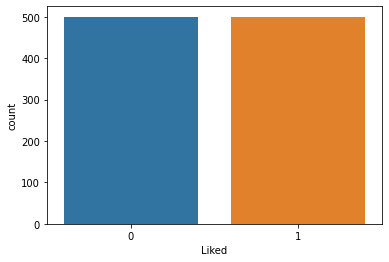

In [ ]:
import seaborn as sns

sns.countplot(x='Liked', data=restaurant_reviews)

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(restaurant_reviews['Review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[5]


'Now am getting angry and want my damn pho '

In [ ]:
y = restaurant_reviews['Liked']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/project/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Method 1#Simple RNN

In [ ]:
from tensorflow.keras.layers import Dense, Softmax
from tensorflow import keras
import tensorflow as tf 
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
#model.add(Dense(no_of_neurons, input_shape=(2,)))
model.add(Dense(2))
model.add(Flatten())
#model.add(Dense(1, activation=sigmoid))
model.add(Softmax())
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 100, 100)          178400    
                                                                 
 dense_14 (Dense)            (None, 100, 2)            202       
                                                                 
 flatten_8 (Flatten)         (None, 200)               0         
                                                                 
 softmax_14 (Softmax)        (None, 200)               0         
                                                                 
Total params: 178,602
Trainable params: 202
Non-trainable params: 178,400
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, epochs=6, verbose=2,validation_split=0.2)


Epoch 1/6
20/20 - 1s - loss: 0.0050 - acc: 0.0812 - val_loss: 0.0050 - val_acc: 0.0375 - 658ms/epoch - 33ms/step
Epoch 2/6
20/20 - 0s - loss: 0.0050 - acc: 0.0641 - val_loss: 0.0050 - val_acc: 0.0312 - 95ms/epoch - 5ms/step
Epoch 3/6
20/20 - 0s - loss: 0.0050 - acc: 0.0547 - val_loss: 0.0050 - val_acc: 0.0312 - 89ms/epoch - 4ms/step
Epoch 4/6
20/20 - 0s - loss: 0.0050 - acc: 0.0406 - val_loss: 0.0050 - val_acc: 0.0312 - 87ms/epoch - 4ms/step
Epoch 5/6
20/20 - 0s - loss: 0.0050 - acc: 0.0391 - val_loss: 0.0050 - val_acc: 0.0312 - 104ms/epoch - 5ms/step
Epoch 6/6
20/20 - 0s - loss: 0.0050 - acc: 0.0344 - val_loss: 0.0050 - val_acc: 0.0312 - 98ms/epoch - 5ms/step


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)


7/7 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.0500


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.005012622103095055
Test Accuracy: 0.05000000074505806


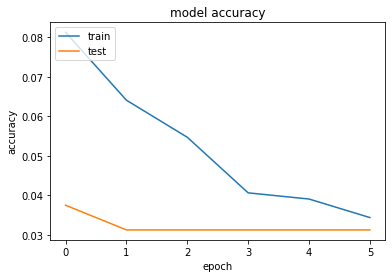

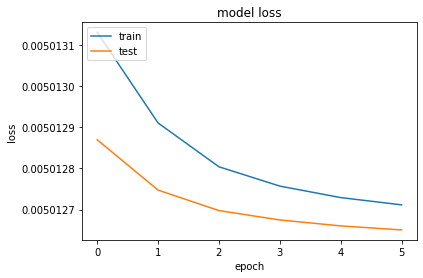

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Method 2 # LSTM

In [ ]:
from tensorflow import keras
from keras.layers.recurrent import LSTM
import tensorflow as tf 


In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))
#model.add(Dense(no_of_neurons, input_shape=(2,)))
model.add(Dense(2))
model.add(Softmax())
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
print(model.summary())


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 100, 100)          178400    
                                                                 
 lstm_8 (LSTM)               (None, 128)               117248    
                                                                 
 dense_17 (Dense)            (None, 2)                 258       
                                                                 
 softmax_17 (Softmax)        (None, 2)                 0         
                                                                 
Total params: 295,906
Trainable params: 117,506
Non-trainable params: 178,400
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=2, validation_split=0.2)



Epoch 1/6
5/5 - 2s - loss: 0.6931 - acc: 0.8000 - val_loss: 0.6931 - val_acc: 1.0000 - 2s/epoch - 415ms/step
Epoch 2/6
5/5 - 2s - loss: 0.6931 - acc: 0.2000 - val_loss: 0.6931 - val_acc: 1.0000 - 2s/epoch - 399ms/step
Epoch 3/6
5/5 - 2s - loss: 0.6931 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 0.0000e+00 - 2s/epoch - 405ms/step
Epoch 4/6
5/5 - 2s - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6931 - val_acc: 1.0000 - 2s/epoch - 401ms/step
Epoch 5/6
5/5 - 2s - loss: 0.6931 - acc: 0.8000 - val_loss: 0.6931 - val_acc: 0.0000e+00 - 2s/epoch - 393ms/step
Epoch 6/6
5/5 - 2s - loss: 0.6931 - acc: 0.2000 - val_loss: 0.6931 - val_acc: 1.0000 - 2s/epoch - 392ms/step


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 1s 88ms/step - loss: 0.6931 - acc: 1.0000


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6931469440460205
Test Accuracy: 1.0


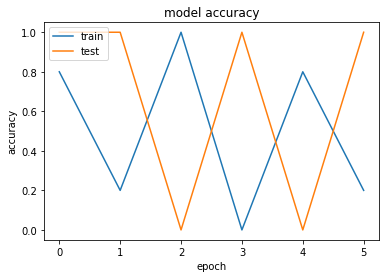

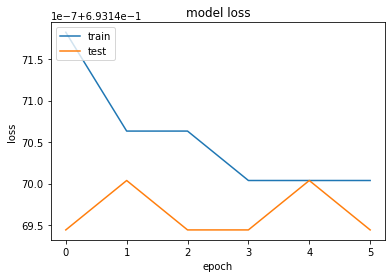

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
instance = X[0]
print(instance)

Wow Loved this place 


In [ ]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)


array([[0.50011426, 0.49988574]], dtype=float32)